# Combining all Data

In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
# Set the path to your folder containing CSV files
folder_path_sensors = "/Users/jakobkuemmerle/Documents/CDL/API_AIR"
folder_path_weather = "/Users/jakobkuemmerle/Documents/CDL/Weather_API"

# Sensor Data
### 1. Read all csv files with Sensor Data

In [48]:
import os
import pandas as pd

# Initialize an empty list to store DataFrames
dfs = []

# List all CSV files in the specified folder
csv_files = [file for file in os.listdir(folder_path_sensors) if file.endswith(".csv")]

# Loop through each CSV file and append its data to the list of DataFrames
for csv_file in csv_files:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(os.path.join(folder_path_sensors, csv_file))

    # Add a new column with the file name (without .csv extension)
    df['sensor_id'] = os.path.splitext(csv_file)[0]
    
    # Rename 'time_stamp' to 'date'
    df = df.rename(columns={'time_stamp': 'date'})

    # Convert 'date' to datetime object
    df['date'] = pd.to_datetime(df['date'])
    
    # Append the DataFrame to the list
    dfs.append(df)

In [49]:
# Concatenate all DataFrames in the list into a single DataFrame
sensor_df = pd.concat(dfs, ignore_index=True)

# Display the combined DataFrame
sensor_df.head()

date  humidity  temperature  pressure  pm2.5_alt  \
0 2020-10-11    35.819       80.364   957.176        1.4   
1 2020-11-28    23.821       80.692   961.921        1.2   
2 2020-10-17    17.943       89.671   954.660        0.5   
3 2020-09-24    30.565       85.556   956.637        1.2   
4 2020-12-06    26.742       83.439   963.470        4.9   

   scattering_coefficient  visual_range  0.3_um_count  5.0_um_count  \
0                     4.5         254.1       296.972         0.321   
1                     4.2         260.0       277.775         0.216   
2                     1.6         328.2       104.678         0.267   
3                     4.2         258.7       281.900         0.241   
4                    14.7         141.2       979.037         0.951   

   pm1.0_atm  pm2.5_atm  pm2.5_cf_1  pm10.0_atm sensor_id  
0      0.982      1.657       1.657       1.860     66849  
1      0.737      1.197       1.197       1.333     66849  
2      0.099      0.277       0.277       0.422     66849  
3      0.877      1.294       1.294       1.430     66849  
4      4.754      7.485       7.485       8.104     66849

### 2. Stats and decription

In [50]:
sensor_df.describe()

date      humidity   temperature  \
count                          22304  22304.000000  2.230400e+04   
mean   2021-07-20 16:22:46.140602624     33.188816  6.971777e+02   
min              2018-01-10 00:00:00      0.000000  0.000000e+00   
25%              2020-05-12 00:00:00     23.013000  5.668950e+01   
50%              2021-08-28 00:00:00     31.473500  6.942300e+01   
75%              2022-10-30 00:00:00     42.887000  8.111000e+01   
max              2023-11-26 00:00:00    100.000000  2.324186e+06   
std                              NaN     14.292179  3.566561e+04   

           pressure     pm2.5_alt  scattering_coefficient  visual_range  \
count  22304.000000  22304.000000            22304.000000  22304.000000   
mean     887.664871      7.395884               22.688926    181.668288   
min        0.000000      0.000000                0.000000      0.000000   
25%      875.140500      1.300000                4.800000    118.100000   
50%      956.778500      2.600000                9.800000    179.700000   
75%      975.105750      5.300000               19.200000    246.900000   
max     1021.832000    854.600000              972.500000    381.900000   
std      204.378174     24.196773               53.313332     85.635260   

       0.3_um_count  5.0_um_count     pm1.0_atm     pm2.5_atm    pm2.5_cf_1  \
count  22304.000000  22304.000000  22304.000000  22304.000000  22304.000000   
mean    1512.602750      2.074066      8.994910     13.043425     16.888736   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%      321.765125      0.310000      0.877000      1.481000      1.495375   
50%      650.051000      0.555500      2.574250      3.874250      3.907500   
75%     1278.755125      1.141125      5.869875      8.832625      9.043875   
max    64832.315000    625.403500   1815.447000   1816.865000   2723.638500   
std     3554.204801     11.836599     65.532754     69.786908    104.574789   

         pm10.0_atm  
count  22304.000000  
mean      13.990670  
min        0.000000  
25%        1.610875  
50%        4.146750  
75%        9.433875  
max     1817.453500  
std       71.890378

In [51]:
sensor_df.shape

(22304, 14)

In [52]:
sensor_df.dtypes

date                      datetime64[ns]
humidity                         float64
temperature                      float64
pressure                         float64
pm2.5_alt                        float64
scattering_coefficient           float64
visual_range                     float64
0.3_um_count                     float64
5.0_um_count                     float64
pm1.0_atm                        float64
pm2.5_atm                        float64
pm2.5_cf_1                       float64
pm10.0_atm                       float64
sensor_id                         object
dtype: object

In [53]:
# Count the number of rows with value 0.000 for each column
zero_count_per_column = (sensor_df == 0.000).sum()

# Display the result
print(zero_count_per_column)

date                         0
humidity                   540
temperature                540
pressure                  1027
pm2.5_alt                    2
scattering_coefficient       2
visual_range                 2
0.3_um_count                 2
5.0_um_count                 9
pm1.0_atm                   57
pm2.5_atm                    4
pm2.5_cf_1                   4
pm10.0_atm                   3
sensor_id                    0
dtype: int64


### Analyze Extreme Outliers

In [54]:
from scipy.stats import zscore

# Define a function to count extreme outliers using Z-score for specified columns
def count_outliers_zscore(column):
    # Try to convert the column to numeric, ignoring errors
    numeric_column = pd.to_numeric(column, errors='coerce')
    
    # Calculate z-scores for the numeric column
    z_scores = np.abs(zscore(numeric_column))
    
    # Count extreme outliers
    return (z_scores > 3).sum()

# List of columns to exclude
exclude_columns = ["time_stamp", "sensor_id"]

# Select columns for outlier detection (exclude specified columns)
columns_for_outliers = [col for col in sensor_df.columns if col not in exclude_columns]

# Count extreme outliers for each selected column
outliers_count_zscore = sensor_df[columns_for_outliers].apply(count_outliers_zscore)

# Display the result
print(outliers_count_zscore)

date                         0
humidity                    26
temperature                  7
pressure                  1027
pm2.5_alt                  296
scattering_coefficient     429
visual_range                 0
0.3_um_count               430
5.0_um_count               168
pm1.0_atm                   62
pm2.5_atm                  120
pm2.5_cf_1                 122
pm10.0_atm                 135
dtype: int64


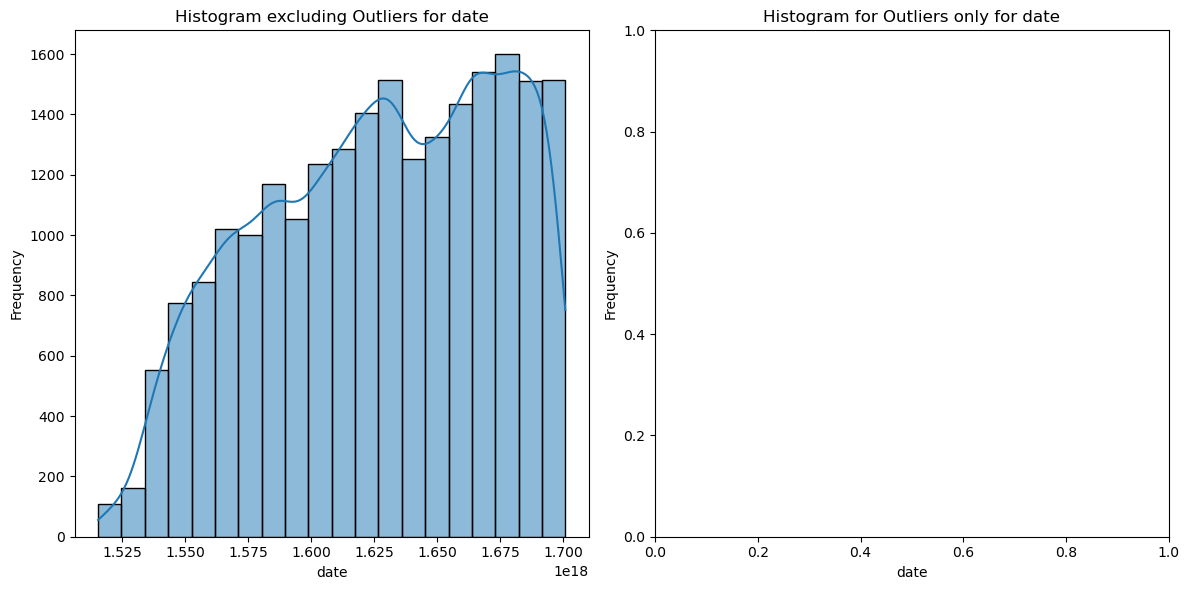

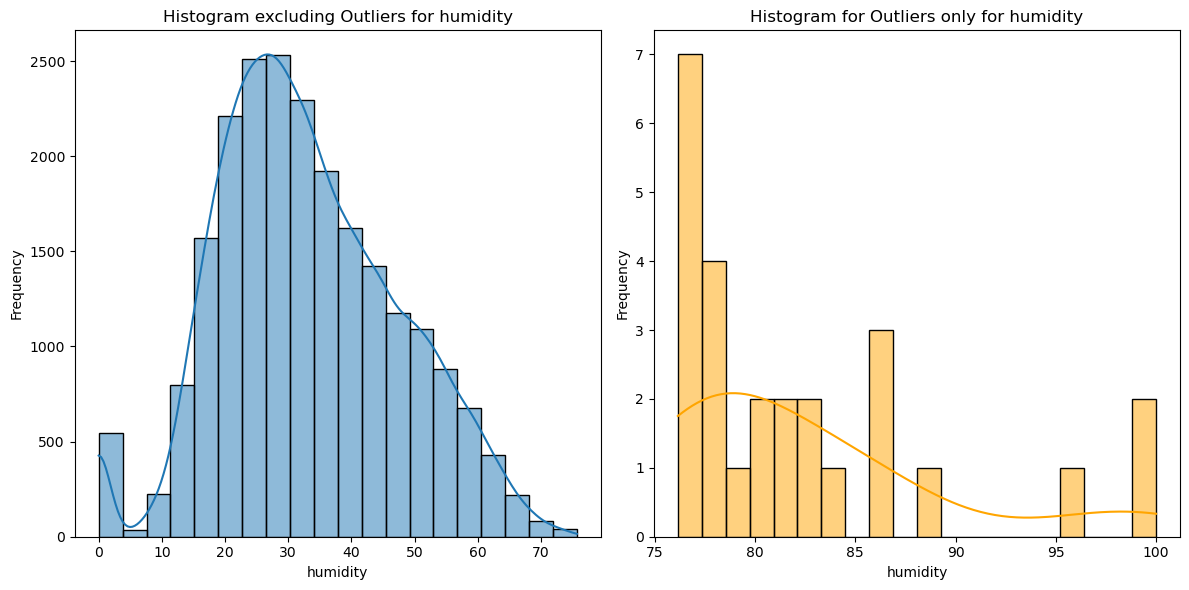

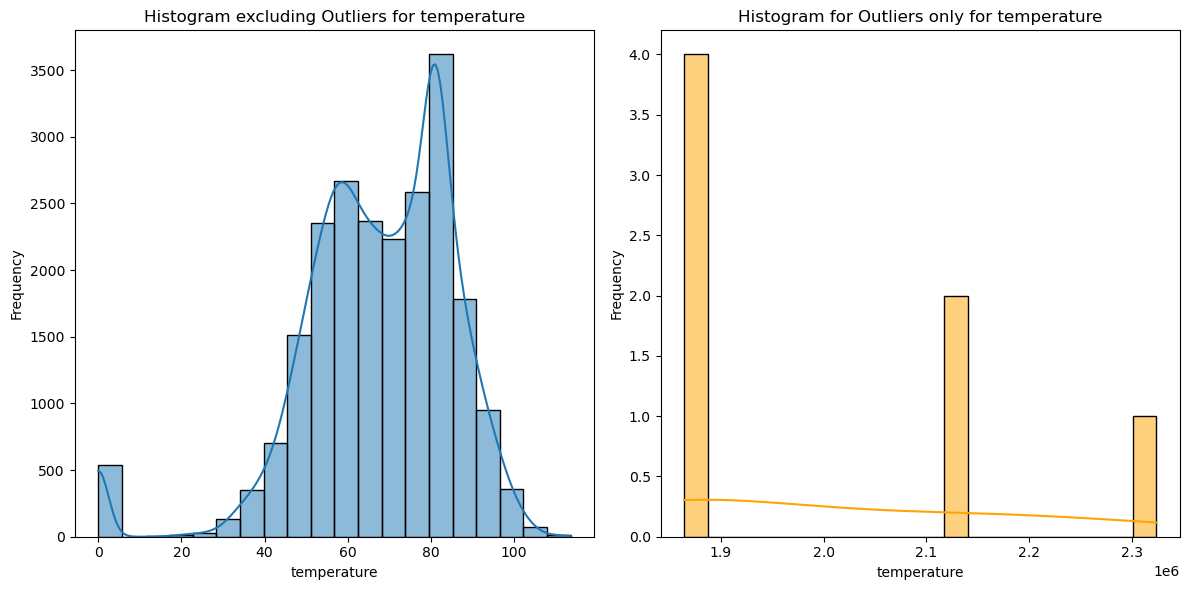

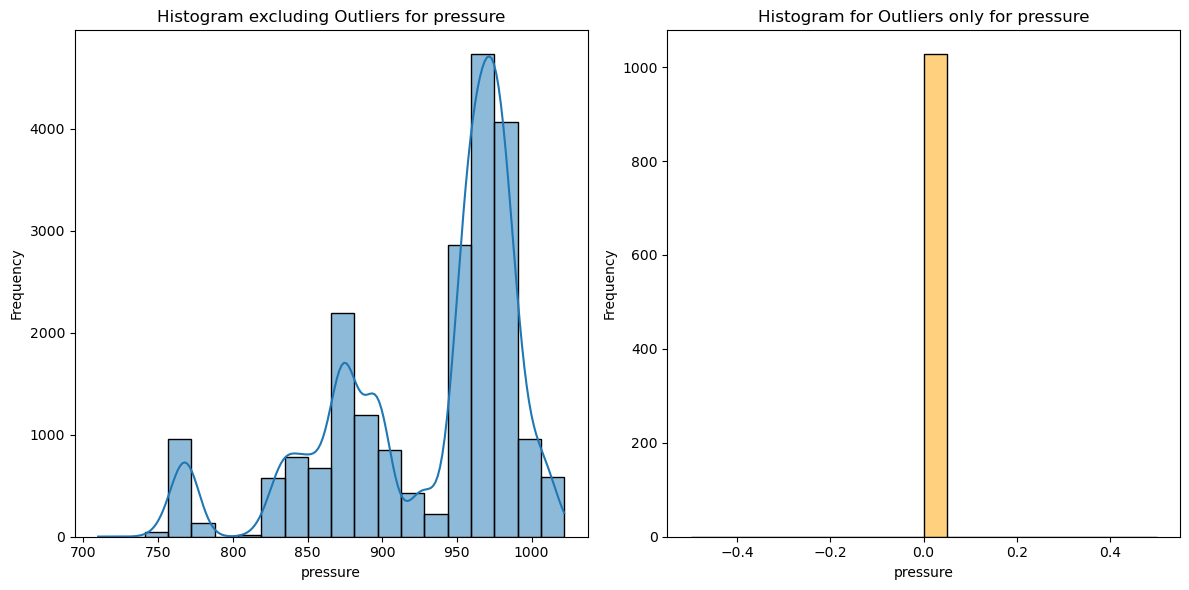

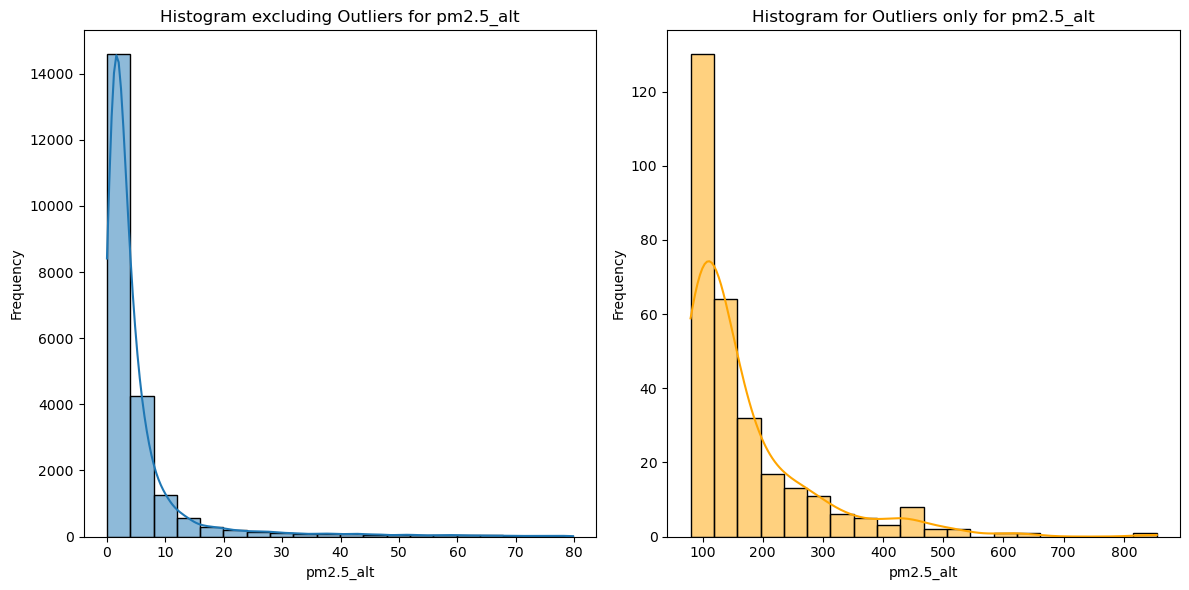

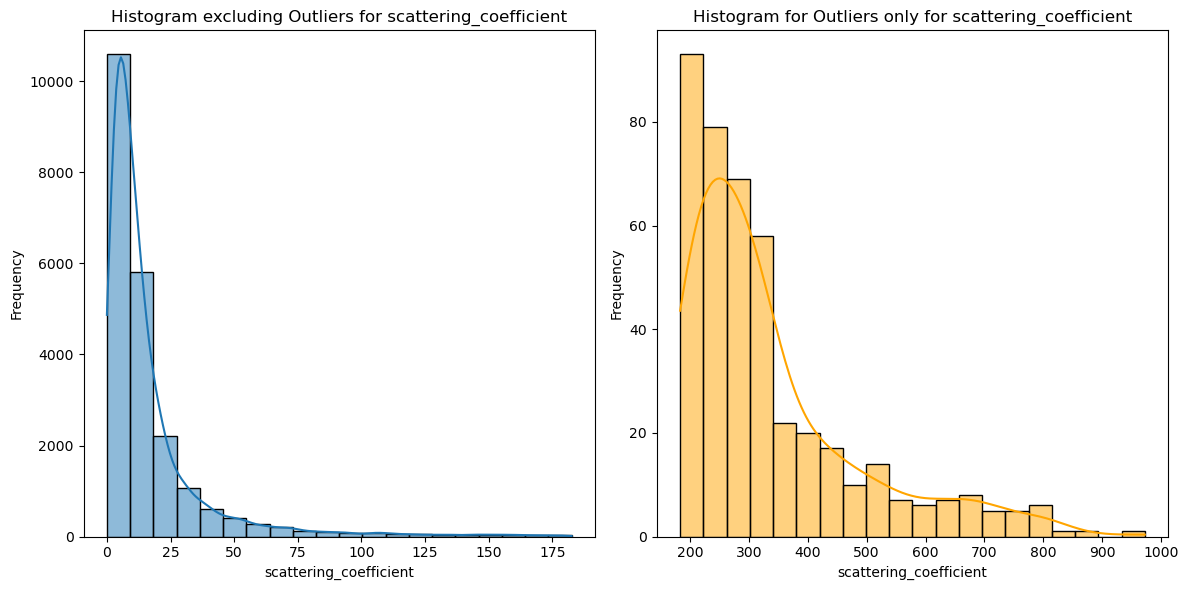

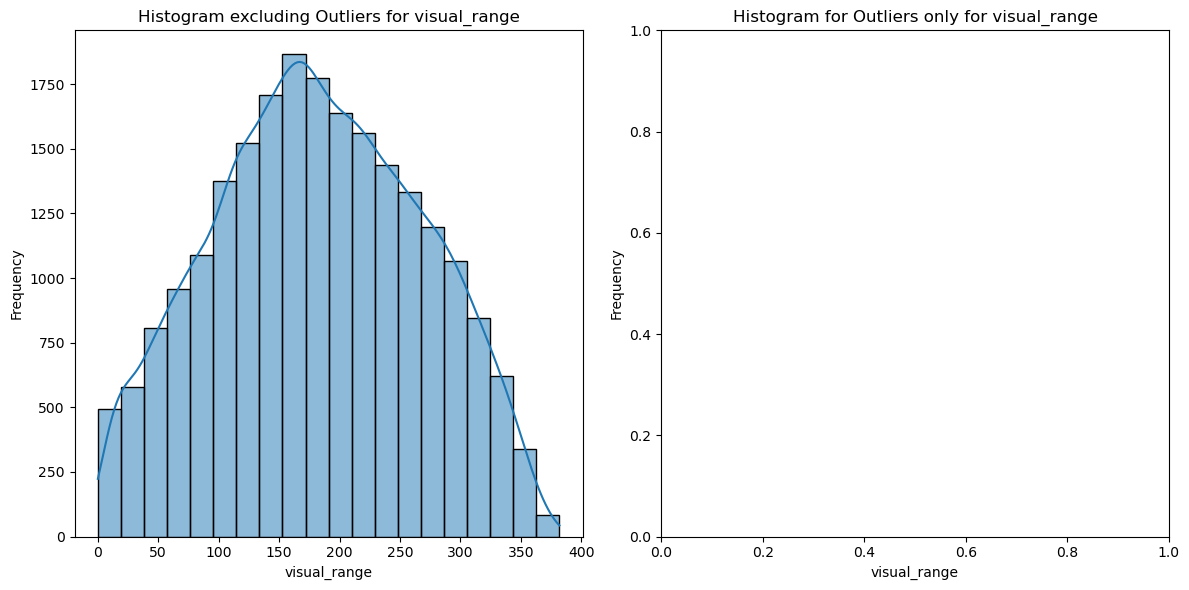

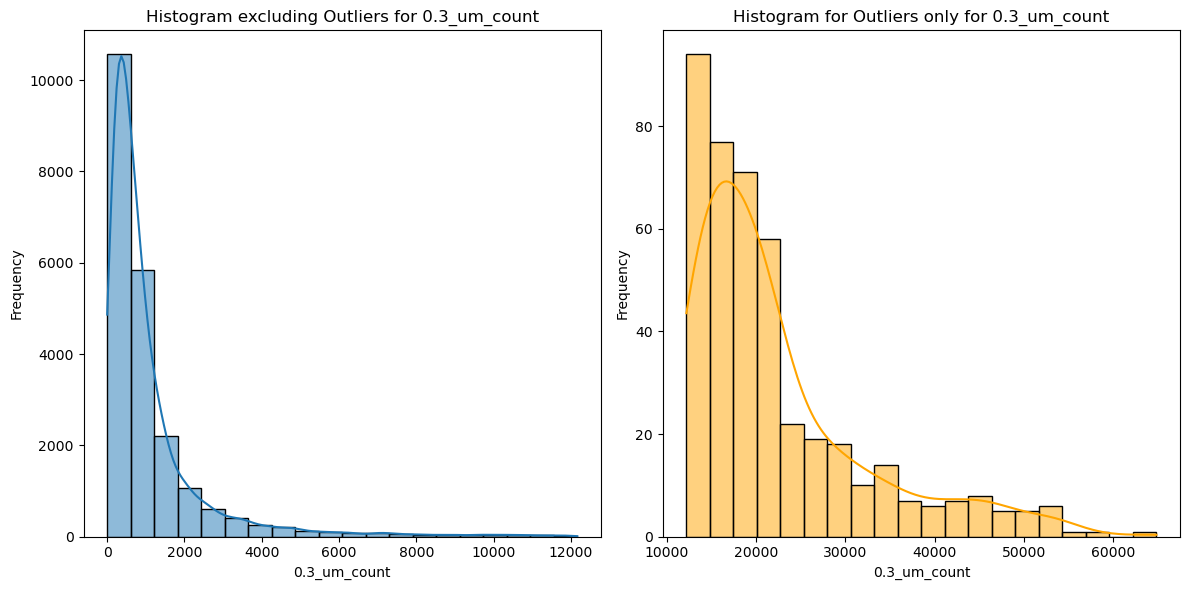

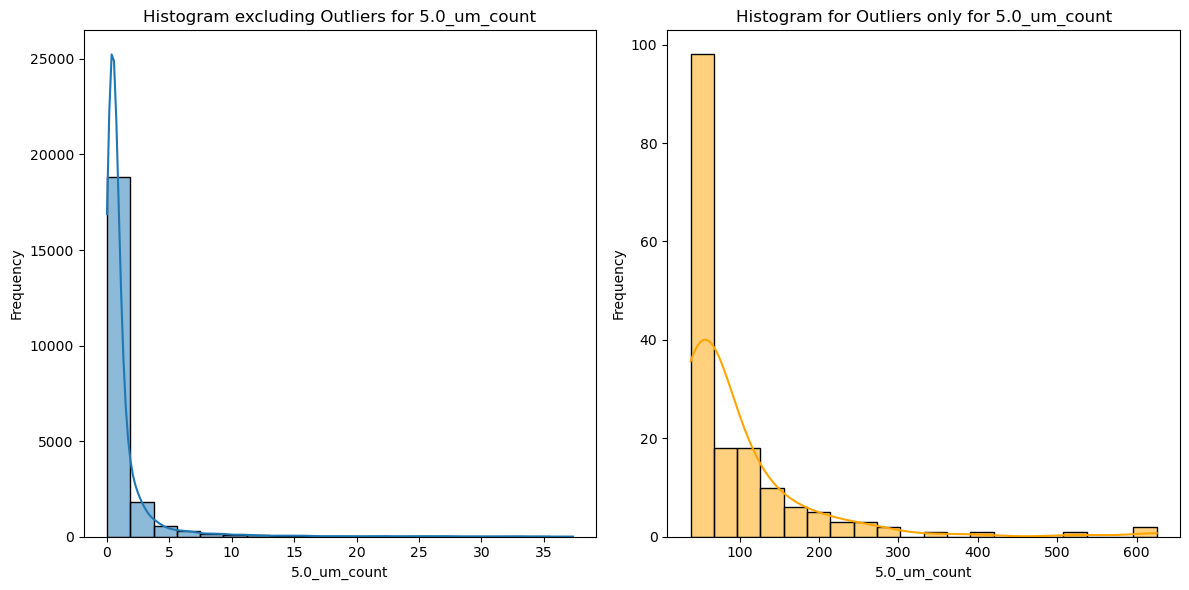

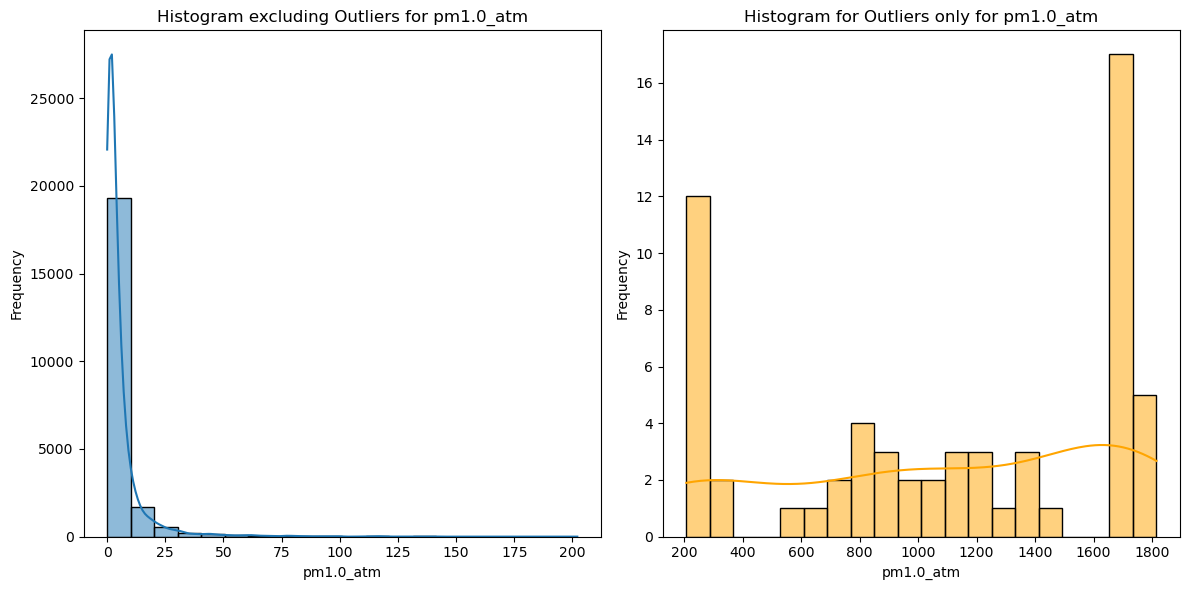

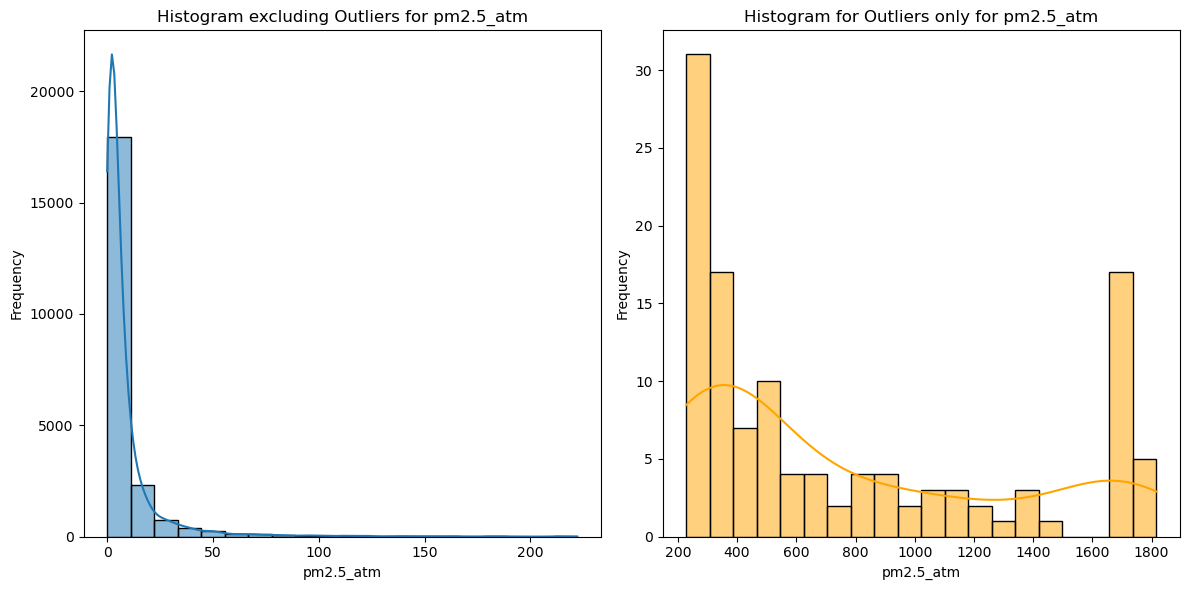

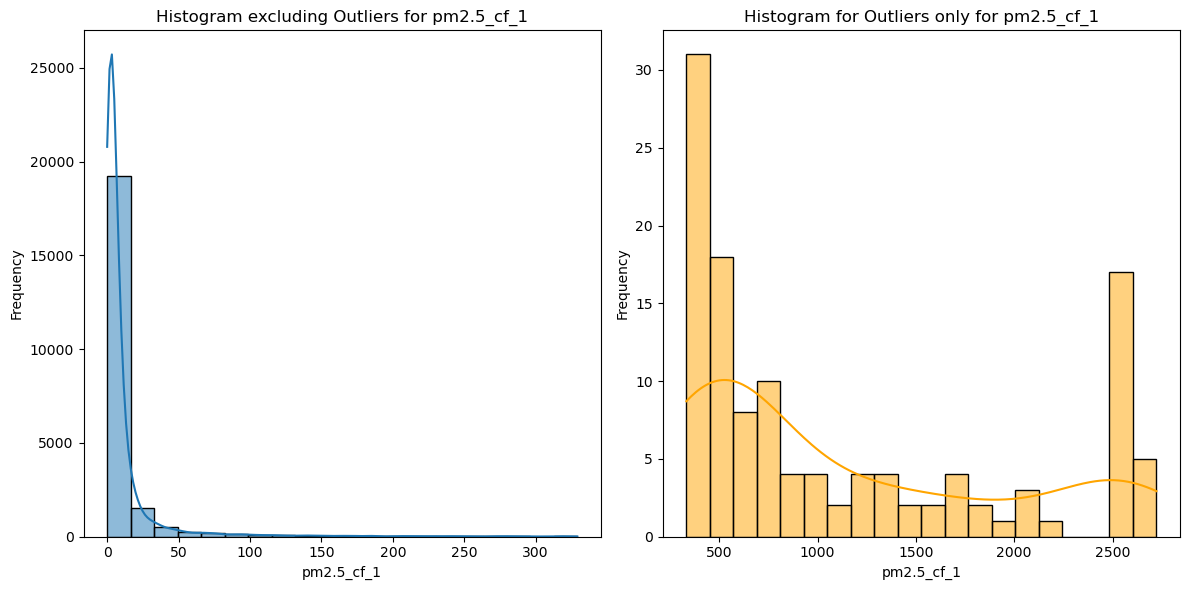

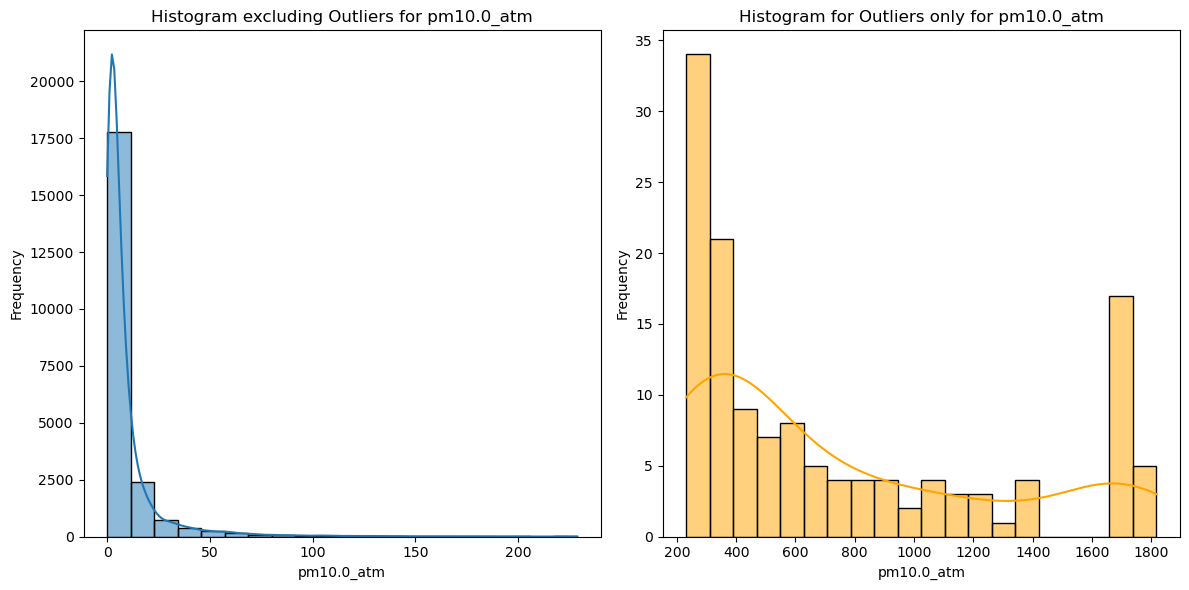

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import warnings

# Suppress FutureWarnings from Seaborn
warnings.simplefilter(action='ignore', category=FutureWarning)

# Define a function to create subplots for each column, showing histograms with and without outliers
def plot_combined_histograms(column):
    # Try to convert the column to numeric, ignoring errors
    numeric_column = pd.to_numeric(column, errors='coerce')
    
    # Calculate z-scores for the numeric column
    z_scores = np.abs(zscore(numeric_column))
    
    # Identify non-outliers and outliers
    non_outliers = numeric_column[z_scores <= 3]
    outliers = numeric_column[z_scores > 3]
    
    # Create subplots
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Plot histogram excluding outliers (left subplot)
    sns.histplot(non_outliers, bins=20, kde=True, ax=axs[0])
    axs[0].set_title(f'Histogram excluding Outliers for {column.name}')
    axs[0].set_xlabel(column.name)
    axs[0].set_ylabel('Frequency')

    # Plot histogram for outliers only (right subplot)
    sns.histplot(outliers, bins=20, kde=True, ax=axs[1], color='orange')
    axs[1].set_title(f'Histogram for Outliers only for {column.name}')
    axs[1].set_xlabel(column.name)
    axs[1].set_ylabel('Frequency')

    # Adjust layout for better spacing
    plt.tight_layout()
    
    # Show the combined visualization
    plt.show()

# List of columns to exclude
exclude_columns = ["time_stamp", "sensor_id"]

# Select columns for outlier detection (exclude specified columns)
columns_for_outliers = [col for col in sensor_df.columns if col not in exclude_columns]

# Plot combined histograms for each selected column
for col in columns_for_outliers:
    plot_combined_histograms(sensor_df[col])


### 3. Imputation?

- We need to handle the 0.000 values for pressure, humidity and temperature
- Air Quality Measure seem ok, don't exclude since they are the wildfire situation
- Extremely High Temp = Wildfire or error?

In [56]:
export_path = "/Users/jakobkuemmerle/Documents/CDL"

# Export the DataFrame to a CSV file
sensor_df.to_csv(f"{export_path}/Sensor_Data_Cleaned.csv", index=False)

# Weather Data

In [26]:
import os
import pandas as pd

# Initialize an empty list to store DataFrames
dfs = []

# List all CSV files in the specified folder
csv_files = [file for file in os.listdir(folder_path_weather) if file.endswith(".csv")]

# Loop through each CSV file and append its data to the list of DataFrames
for csv_file in csv_files:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(os.path.join(folder_path_weather, csv_file))

    # Add a new column with the file name (without .csv extension)
    df['sensor_id'] = os.path.splitext(csv_file)[0]
    df['sensor_id'] = df['sensor_id'].str.split('_').str[0]

    # Append the DataFrame to the list
    dfs.append(df)


In [30]:
# Concatenate all DataFrames in the list into a single DataFrame
weather_df = pd.concat(dfs, ignore_index=True)

# Display the combined DataFrame
weather_df.head()

date  tavg  tmin  tmax  prcp  snow  wdir  wspd  wpgt    pres  tsun  \
0  2019-01-01   8.6   5.6  14.4   0.0   0.0   NaN  20.5   NaN     NaN   NaN   
1  2019-01-02   6.6  -1.6  14.4   0.0   0.0   NaN   3.2   NaN  1023.8   NaN   
2  2019-01-03   4.4  -1.0  12.2   0.0   0.0   NaN   1.8   NaN  1023.4   NaN   
3  2019-01-04   5.1   0.0  13.9   0.0   0.0   NaN   2.9   NaN  1015.6   NaN   
4  2019-01-05   4.2   0.0   8.9  28.2   0.0   NaN  10.4   NaN     NaN   NaN   

  sensor_id  
0     19989  
1     19989  
2     19989  
3     19989  
4     19989

In [32]:
weather_df['date'] = pd.to_datetime(weather_df['date'])

In [33]:
weather_df.isna().sum()

date             0
tavg           329
tmin           329
tmax           329
prcp          2043
snow         12688
wdir          4338
wspd           672
wpgt         14392
pres          1504
tsun         14392
sensor_id        0
dtype: int64

In [34]:
weather_df.shape

(14392, 12)

In [36]:
# Extract unique values from the 'sensor_id' column
unique_sensor_ids = sensor_df['sensor_id'].unique().tolist()

# Load Sensor Base Info

In [37]:
import requests
import pandas as pd

def get_sensor_data(api_key, list_of_sensors, endpoint="https://api.purpleair.com/v1/sensors/", params=None):
    sensor_data_list = []

    headers = {
        "X-API-Key": api_key,
    }

    if params is None:
        params = {
            "fields": "name, model, hardware, location_type, private, latitude, longitude, altitude, position_rating, uptime, pa_latency, memory, last_seen, last_modified, date_created",
        }

    for sensor_id in list_of_sensors:
        try:
            response = requests.get(f"{endpoint}{sensor_id}", headers=headers, params=params)

            if response.status_code == 200:
                sensor_info = response.json().get('sensor')
                sensor_data_list.append(sensor_info)

            else:
                print(f"Error for sensor {sensor_id}: {response.status_code} - {response.text}")

        except Exception as e:
            print(f"An error occurred for sensor {sensor_id}: {e}")

    # Create a DataFrame from the list of sensor data
    sensor_base_df = pd.DataFrame(sensor_data_list)

    # Convert date-related columns to datetime
    date_columns = ['last_modified', 'date_created', 'last_seen']
    sensor_base_df[date_columns] = sensor_base_df[date_columns].apply(pd.to_datetime, unit='s')

    return sensor_base_df


In [38]:
# Example usage
api_key = "E911C960-894A-11EE-8616-42010A80000B"
list_of_sensors = unique_sensor_ids  # Assuming you have unique_sensor_ids defined
sensor_base_df = get_sensor_data(api_key, list_of_sensors)

# Display the resulting DataFrame
sensor_base_df.head()

sensor_index       last_modified        date_created           last_seen  \
0         66849 2020-09-19 01:30:19 2020-09-09 15:53:21 2023-11-28 02:13:57   
1         34275 2019-11-19 20:29:32 2019-07-04 17:10:39 2022-10-13 19:17:12   
2         12869 2018-07-16 17:51:00 2018-07-11 18:43:22 2020-08-20 06:25:16   
3         47673 2020-10-05 17:07:02 2020-01-30 17:03:44 2023-11-28 02:15:00   
4         12302 2021-08-12 18:51:37 2018-06-28 20:03:39 2023-11-28 02:15:41   

   private                              name  location_type     model  \
0        0                       Angwin home              1      PA-I   
1        0  St. Helena Boys &amp; Girls Club              0     PA-II   
2        0                      Empire Grade              0     PA-II   
3        0                        Loyalton-1              0  PA-II-SD   
4        0        CARB_SMOKE_LCAPCD_RICHMOND              0     PA-II   

                                            hardware  uptime  pa_latency  \
0                               2.0+BME280+PMSX003-A   30158       261.0   
1                     2.0+BME280+PMSX003-B+PMSX003-A   40845       295.0   
2                     2.0+BME280+PMSX003-B+PMSX003-A    1183       229.0   
3  2.0+OPENLOG+15802 MB+DS3231+BME280+PMSX003-B+P...   31961       234.0   
4                     2.0+BME280+PMSX003-B+PMSX003-A   31862       428.0   

   memory  position_rating   latitude  longitude  altitude  
0   16168                5  38.576473 -122.45517      1721  
1   14808                5  38.502920 -122.47085       258  
2   19584                5  37.100470 -122.14131      2608  
3   16320                5  39.674890 -120.24149      4954  
4   15928                5  40.371674 -120.63871      4239

In [46]:
# Convert 'sensor_index' to object type
sensor_base_df['sensor_index'] = sensor_base_df['sensor_index'].astype(str)

# Rename columns
sensor_base_df = sensor_base_df.rename(columns={
    'sensor_index': 'sensor_id',
    'date_created': 'sensor_date_created',
    'last_seen': 'sensor_last_seen',
    'latitude': 'sensor_latitude',
    'longitude': 'sensor_longitude'
})

# Load Wildfire Data

In [76]:
import pandas as pd
import numpy as np
from io import StringIO

# Function to process wildfire data
def process_wildfires(csv_file_path):
    df_wildfires = pd.read_csv(csv_file_path)
    date_columns = ['incident_date_created', 'incident_date_last_update', 'incident_date_extinguished']
    df_wildfires[date_columns] = df_wildfires[date_columns].apply(pd.to_datetime)

    mask = df_wildfires['incident_name'].duplicated(keep=False)
    counter = {}

    def generate_new_name(name):
        if name not in counter:
            counter[name] = 1
            return name
        else:
            counter[name] += 1
            return f'{name}_{counter[name] - 1}'

    df_wildfires['incident_name'] = df_wildfires.apply(lambda row: generate_new_name(row['incident_name']) if mask[row.name] else row['incident_name'], axis=1)

    df_filtered = df_wildfires[df_wildfires['incident_date_created'] > '2019-01-01']
    
    # Define the conditions and corresponding values
    conditions = [
    (df_filtered['incident_acres_burned'] < 100),
    (df_filtered['incident_acres_burned'] < 1000),
    (df_filtered['incident_acres_burned'] < 10000),
    (df_filtered['incident_acres_burned'] < 100000),
    (df_filtered['incident_acres_burned'] < 1000000),
    (df_filtered['incident_acres_burned'] > 1000000),
    ]
    values = [1, 2, 3, 4, 5, 6]

    # Use np.select to create the 'size' column based on conditions
    df_filtered['size'] = np.select(conditions, values, default=0)
    
    df_filtered = df_filtered.drop(['incident_containment', 'incident_administrative_unit_url', 'incident_administrative_unit'], axis=1)
    df_filtered = df_filtered.drop(['incident_is_final', 'notification_desired', 'incident_url'], axis=1)
    df_filtered = df_filtered.drop(['incident_dateonly_extinguished', 'incident_dateonly_created', 'is_active'], axis=1)
    df_filtered = df_filtered.drop(['calfire_incident', 'incident_longitude_rounded','incident_latitude_rounded'], axis=1)
    df_filtered = df_filtered.drop(['incident_location', 'incident_control','incident_cooperating_agencies','incident_type'], axis=1)
    
    return df_filtered

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the Earth in kilometers
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat/2) ** 2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon/2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    distance = R * c
    return distance

In [77]:
csv_file_path = "/Users/jakobkuemmerle/Documents/CDL/Cali_Wildfire_incidents_Data.csv"
wildfire_df = process_wildfires(csv_file_path)
wildfire_df.head()

/var/folders/88/rkxmpw3j3nlddb7phwjzbx6r0000gn/T/ipykernel_23877/1060261992.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['size'] = np.select(conditions, values, default=0)


incident_name incident_date_last_update     incident_date_created  \
1198  Pilot Fire_1 2019-01-15 10:38:00+00:00 2019-01-01 14:14:00+00:00   
1207  Scott Fire_1 2019-06-27 08:24:51+00:00 2019-06-25 13:51:09+00:00   
1208   York Fire_1 2019-06-24 11:45:00+00:00 2019-04-28 22:20:00+00:00   
1209     Cana Fire 2019-05-08 08:47:00+00:00 2019-04-30 12:20:00+00:00   
1210    Woody Fire 2019-05-08 08:47:00+00:00 2019-04-30 18:37:00+00:00   

     incident_county  incident_acres_burned  incident_longitude  \
1198        Humboldt                   30.0         -123.675556   
1207            Yuba                   80.0         -121.323990   
1208           Kings                  161.0         -120.097150   
1209           Butte                   10.0         -121.957000   
1210            Kern                  115.0         -118.925450   

      incident_latitude                           incident_id  \
1198          40.618056  6004d3e5-66f8-487a-80a4-689d3852378c   
1207          39.246780  31cbc968-6d9d-412b-8bc3-6846ca398fe2   
1208          35.817780  85bdd89a-4ce5-4539-a274-23fa2b030e7d   
1209          39.839580  34abbc65-5bbe-474b-85c8-16d07bb5b503   
1210          35.651890  d3beabf6-63e9-4cad-a17c-58bb36abd7ac   

     incident_date_extinguished  size  
1198  2019-01-15 10:38:00+00:00     1  
1207  2019-06-25 13:50:00+00:00     1  
1208  2019-06-24 11:45:00+00:00     2  
1209  2019-05-08 08:47:00+00:00     1  
1210  2019-05-08 08:47:00+00:00     2

In [133]:
def find_best_candidates(base_sensors, wildfires, min_distance):
    # Create a cartesian product of the two DataFrames
    cartesian_df = pd.merge(base_sensors.assign(key=1), wildfires.assign(key=1), on='key').drop('key', axis=1)

    # Adjust column names in the haversine function
    cartesian_df['distance'] = haversine(cartesian_df['sensor_latitude'], cartesian_df['sensor_longitude'],
                                         cartesian_df['incident_latitude'], cartesian_df['incident_longitude'])
    
    #result_df = cartesian_df[cartesian_df['distance'] < min_distance * np.square(cartesian_df['size'])]
    result_df = cartesian_df[cartesian_df['distance'] < min_distance * cartesian_df['size']]

    result_df['sensor_date_created'] = pd.to_datetime(result_df['sensor_date_created'])
    result_df['sensor_last_seen'] = pd.to_datetime(result_df['sensor_last_seen'])
    result_df['incident_date_created'] = pd.to_datetime(result_df['incident_date_created'])
    result_df['incident_date_extinguished'] = pd.to_datetime(result_df['incident_date_extinguished'])

    result_df['incident_date_created'] = result_df['incident_date_created'].dt.tz_localize(None)
    result_df['incident_date_extinguished'] = result_df['incident_date_extinguished'].dt.tz_localize(None)
    
    result_df = result_df[(result_df['sensor_date_created'] <= result_df['incident_date_extinguished']) & 
                          (result_df['sensor_last_seen'] >= result_df['incident_date_created'])]

    test_df = result_df.copy()
    result_df = result_df.groupby(['sensor_id']).agg({
        'incident_name': lambda x: x.tolist()
    }).reset_index()

    result_df.columns = ['sensor_id', 'matching_incidents']

    result_df['count_fires'] = result_df['matching_incidents'].apply(len)
    result_df = result_df.sort_values(by='count_fires', ascending=False)
    
    return test_df

In [186]:
min_distance = 5

sensor_wildfire = find_best_candidates(sensor_base_df, wildfire_df, min_distance)
print(sensor_wildfire.shape)
sensor_wildfire.head()

(33, 27)


/var/folders/88/rkxmpw3j3nlddb7phwjzbx6r0000gn/T/ipykernel_23877/205616747.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['sensor_date_created'] = pd.to_datetime(result_df['sensor_date_created'])
/var/folders/88/rkxmpw3j3nlddb7phwjzbx6r0000gn/T/ipykernel_23877/205616747.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['sensor_last_seen'] = pd.to_datetime(result_df['sensor_last_seen'])
/var/folders/88/rkxmpw3j3nlddb7phwjzbx6r0000gn/T/ipykernel_23877/205616747.py:14: SettingWithC

sensor_id       last_modified sensor_date_created    sensor_last_seen  \
490      66849 2020-09-19 01:30:19 2020-09-09 15:53:21 2023-11-28 02:13:57   
1469     34275 2019-11-19 20:29:32 2019-07-04 17:10:39 2022-10-13 19:17:12   
2411     12869 2018-07-16 17:51:00 2018-07-11 18:43:22 2020-08-20 06:25:16   
3201     47673 2020-10-05 17:07:02 2020-01-30 17:03:44 2023-11-28 02:15:00   
3378     47673 2020-10-05 17:07:02 2020-01-30 17:03:44 2023-11-28 02:15:00   

      private                              name  location_type     model  \
490         0                       Angwin home              1      PA-I   
1469        0  St. Helena Boys &amp; Girls Club              0     PA-II   
2411        0                      Empire Grade              0     PA-II   
3201        0                        Loyalton-1              0  PA-II-SD   
3378        0                        Loyalton-1              0  PA-II-SD   

                                               hardware  uptime  ...  \
490                                2.0+BME280+PMSX003-A   30158  ...   
1469                     2.0+BME280+PMSX003-B+PMSX003-A   40845  ...   
2411                     2.0+BME280+PMSX003-B+PMSX003-A    1183  ...   
3201  2.0+OPENLOG+15802 MB+DS3231+BME280+PMSX003-B+P...   31961  ...   
3378  2.0+OPENLOG+15802 MB+DS3231+BME280+PMSX003-B+P...   31961  ...   

      incident_date_last_update  incident_date_created        incident_county  \
490   2022-10-21 13:37:57+00:00    2020-09-27 08:48:00           Napa, Sonoma   
1469  2022-10-21 13:37:57+00:00    2020-09-27 08:48:00           Napa, Sonoma   
2411  2022-10-21 13:32:14+00:00    2020-08-16 08:00:00  Santa Cruz, San Mateo   
3201  2020-02-24 14:41:27+00:00    2020-02-17 15:04:08                 Sierra   
3378  2020-08-27 06:54:38+00:00    2020-08-14 18:52:58                 Sierra   

      incident_acres_burned  incident_longitude  incident_latitude  \
490                 67484.0         -122.497450          38.562950   
1469                67484.0         -122.497450          38.562950   
2411                86509.0         -122.222750          37.171620   
3201                  102.0         -120.329185          39.692300   
3378                47029.0         -120.143473          39.702438   

                               incident_id incident_date_extinguished size  \
490   d6b00a56-682d-4908-bf07-45eef54c9198        2020-10-20 11:00:00    4   
1469  d6b00a56-682d-4908-bf07-45eef54c9198        2020-10-20 11:00:00    4   
2411  d19ac7c7-c899-4600-82c9-fe24dc29f3c9        2020-09-22 19:53:00    4   
3201  c9bb59f7-be32-4296-8c11-3f1233116827        2020-02-20 14:40:00    2   
3378  ab24840f-90e8-460c-bc88-d25091d7b61f        2020-08-26 06:54:00    4   

       distance  
490    3.971406  
1469   7.064657  
2411  10.710264  
3201   7.750107  
3378   8.928936  

[5 rows x 27 columns]

In [187]:
expanded_rows = []

# Iterate over each row in the DataFrame
for index, row in sensor_wildfire.iterrows():
    # Extract relevant information from the row
    sensor_id = row['sensor_id']
    incident_name = row['incident_name']
    date_created = row['incident_date_created']
    date_extinguished = row['incident_date_extinguished']

    # Handle bad-formatted times
    try:
        date_ranges = pd.date_range(start=date_created, end=date_extinguished, freq='D')
    except TypeError:
        date_ranges = [pd.to_datetime(date_created)]

    # Create rows for each date in the date range
    for date in date_ranges:
        expanded_rows.append({'sensor_id': sensor_id, 'incident_name': incident_name, 'incident_date': date})

# Create a new DataFrame from the list of expanded rows
df_expanded = pd.DataFrame(expanded_rows)
df_expanded.head()

sensor_id incident_name       incident_date
0     66849  Glass Fire_1 2020-09-27 08:48:00
1     66849  Glass Fire_1 2020-09-28 08:48:00
2     66849  Glass Fire_1 2020-09-29 08:48:00
3     66849  Glass Fire_1 2020-09-30 08:48:00
4     66849  Glass Fire_1 2020-10-01 08:48:00

In [188]:
# Select relevant columns from sensor_wildfire
columns_to_select = ['sensor_id', 'incident_name', 'incident_acres_burned', 'incident_longitude', 'incident_latitude', 'size', 'distance']

# Merge df_expanded and sensor_wildfire on sensor_id and incident_name
df_expanded = pd.merge(df_expanded, sensor_wildfire[columns_to_select], how='left', left_on=['incident_name', 'sensor_id'], right_on=['incident_name', 'sensor_id'])
df_expanded.shape


(655, 8)

In [189]:

# Extract date from 'incident_date'
df_expanded['date'] = df_expanded['incident_date'].dt.date

# Define custom aggregation functions to get lists
def list_agg(series):
    return list(series)

# Group by 'sensor_id' and 'date_only' and perform aggregations
grouped_df = df_expanded.groupby(['sensor_id', 'date']).agg({
    'incident_name': 'nunique',               # Count unique incident_name
    'size': ['mean', list_agg],               # Calculate average size and get a list
    'distance': ['mean', list_agg]            # Calculate average distance and get a list
}).reset_index()

# Rename columns for clarity
grouped_df.columns = ['sensor_id', 'date', 'unique_incident_count', 'average_size', 'list_of_sizes', 'average_distance', 'list_of_distances']

In [190]:
grouped_df.sort_values('unique_incident_count', ascending = False).head()

sensor_id        date  unique_incident_count  average_size list_of_sizes  \
629     84181  2021-06-19                      2           2.5        [2, 3]   
395     33769  2021-08-30                      2           2.0        [2, 2]   
391     33769  2021-08-26                      2           2.0        [2, 2]   
392     33769  2021-08-27                      2           2.0        [2, 2]   
393     33769  2021-08-28                      2           2.0        [2, 2]   

     average_distance                       list_of_distances  
629          6.013801  [3.396676858481391, 8.630924772450516]  
395          5.932376   [9.887356290305735, 1.97739631778209]  
391          5.932376   [9.887356290305735, 1.97739631778209]  
392          5.932376   [9.887356290305735, 1.97739631778209]  
393          5.932376   [9.887356290305735, 1.97739631778209]

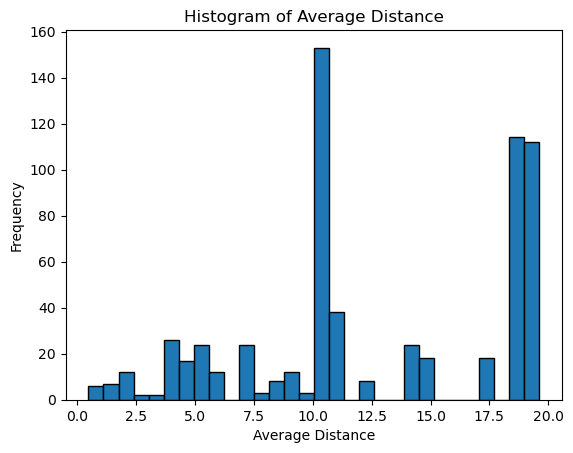

In [191]:
# Plot a histogram of 'average_distance'
plt.hist(grouped_df['average_distance'], bins=30, edgecolor='black')
plt.title('Histogram of Average Distance')
plt.xlabel('Average Distance')
plt.ylabel('Frequency')
plt.show()

# Join Sensor Info, Sensor Data and Weather Data

In [195]:
# Perform a left join on 'sensor_index'
sensor_final_df = pd.merge(sensor_df, sensor_base_df, how='left', left_on='sensor_id', right_on='sensor_id')
# Perform a left join on 'date' and 'sensor_id' in weather_df and 'time_stamp' and 'sensor_id' in sensor_final_df
sensor_final_df = pd.merge(sensor_final_df, weather_df, how='left', left_on=['date', 'sensor_id'], right_on=['date', 'sensor_id'])

sensor_final_df.shape


(22304, 39)

# Join Sensor Data and Wildfire Data


In [198]:
grouped_df['date'] = pd.to_datetime(grouped_df['date'])
final_df = pd.merge(sensor_final_df, grouped_df, how='left', left_on=['date', 'sensor_id'], right_on=['date', 'sensor_id'])
final_df.shape

(22304, 44)

In [199]:
final_df.head()

date  humidity  temperature  pressure  pm2.5_alt  \
0 2020-10-11    35.819       80.364   957.176        1.4   
1 2020-11-28    23.821       80.692   961.921        1.2   
2 2020-10-17    17.943       89.671   954.660        0.5   
3 2020-09-24    30.565       85.556   956.637        1.2   
4 2020-12-06    26.742       83.439   963.470        4.9   

   scattering_coefficient  visual_range  0.3_um_count  5.0_um_count  \
0                     4.5         254.1       296.972         0.321   
1                     4.2         260.0       277.775         0.216   
2                     1.6         328.2       104.678         0.267   
3                     4.2         258.7       281.900         0.241   
4                    14.7         141.2       979.037         0.951   

   pm1.0_atm  ...  wdir  wspd  wpgt pres tsun unique_incident_count  \
0      0.982  ...   NaN   NaN   NaN  NaN  NaN                   1.0   
1      0.737  ...   NaN   NaN   NaN  NaN  NaN                   NaN   
2      0.099  ...   NaN   NaN   NaN  NaN  NaN                   1.0   
3      0.877  ...   NaN   NaN   NaN  NaN  NaN                   NaN   
4      4.754  ...   NaN   NaN   NaN  NaN  NaN                   NaN   

  average_size  list_of_sizes average_distance     list_of_distances  
0          4.0            [4]         3.971406  [3.9714057770836804]  
1          NaN            NaN              NaN                   NaN  
2          4.0            [4]         3.971406  [3.9714057770836804]  
3          NaN            NaN              NaN                   NaN  
4          NaN            NaN              NaN                   NaN  

[5 rows x 44 columns]

In [200]:
# Replace NaN values with 0 in specific columns
columns_to_fillna = ['unique_incident_count', 'average_size', 'average_distance']
final_df[columns_to_fillna] = final_df[columns_to_fillna].fillna(0)

# Create a new column 'target'
final_df['target'] = final_df['unique_incident_count'].apply(lambda x: 1 if x > 0 else 0)

final_df.isna().sum()

date                          0
humidity                      0
temperature                   0
pressure                      0
pm2.5_alt                     0
scattering_coefficient        0
visual_range                  0
0.3_um_count                  0
5.0_um_count                  0
pm1.0_atm                     0
pm2.5_atm                     0
pm2.5_cf_1                    0
pm10.0_atm                    0
sensor_id                     0
last_modified                 0
sensor_date_created           0
sensor_last_seen              0
private                       0
name                          0
location_type                 0
model                         0
hardware                      0
uptime                        0
pa_latency                 1001
memory                        0
position_rating               0
sensor_latitude               0
sensor_longitude              0
altitude                      0
tavg                      11443
tmin                      11443
tmax    

In [201]:
subset_df = final_df.dropna(subset=['tavg'])
subset_df.head()

date  humidity  temperature  pressure  pm2.5_alt  \
2303 2019-10-11    15.918       68.038   926.446        3.3   
2304 2019-08-27    10.035       90.543   923.192        0.4   
2305 2019-12-13    55.267       60.675   933.648        0.9   
2306 2019-01-23    32.291       54.944   937.922        0.6   
2307 2019-02-15    70.416       45.442   922.313        0.5   

      scattering_coefficient  visual_range  0.3_um_count  5.0_um_count  \
2303                    11.4         164.5      761.3590        0.8265   
2304                     1.6         327.9      105.2000        0.0625   
2305                     3.0         286.5      200.6605        0.5825   
2306                     2.3         306.6      151.0885        0.3530   
2307                     1.7         324.8      111.5450        0.6515   

      pm1.0_atm  ...  wspd  wpgt    pres tsun unique_incident_count  \
2303     3.6135  ...   5.4   NaN  1015.2  NaN                   0.0   
2304     0.1225  ...  10.1   NaN  1010.0  NaN                   0.0   
2305     0.4445  ...   7.5   NaN     NaN  NaN                   0.0   
2306     0.4850  ...   5.2   NaN  1028.8  NaN                   0.0   
2307     0.1815  ...  10.2   NaN  1015.8  NaN                   0.0   

     average_size list_of_sizes  average_distance list_of_distances  target  
2303          0.0           NaN               0.0               NaN       0  
2304          0.0           NaN               0.0               NaN       0  
2305          0.0           NaN               0.0               NaN       0  
2306          0.0           NaN               0.0               NaN       0  
2307          0.0           NaN               0.0               NaN       0  

[5 rows x 45 columns]

In [202]:

# Calculate the number of unique sensor_ids
total_unique_sensor_ids = subset_df['sensor_id'].nunique()

# Group by 'sensor_id' and check if at least one row has 'target' equal to 1
sensor_with_target_1 = subset_df.groupby('sensor_id')['target'].apply(lambda x: (x > 0).any())

# Count the number of True values (sensor_id with at least one row where target is 1)
num_sensors_with_target_1 = sensor_with_target_1.sum()

# Display the results
print(f"Number of unique sensor_ids: {total_unique_sensor_ids}")
print(f"Number of sensor_ids with at least one row where target is 1: {num_sensors_with_target_1}")
print(f"Percentage of sensor_ids with at least one row where target is 1: {num_sensors_with_target_1 / total_unique_sensor_ids * 100:.2f}%")

Number of unique sensor_ids: 8
Number of sensor_ids with at least one row where target is 1: 8
Percentage of sensor_ids with at least one row where target is 1: 100.00%


In [203]:

# Calculate the number of unique sensor_ids
total_unique_sensor_ids = subset_df['sensor_id'].nunique()

# Group by 'sensor_id' and check if at least one row has 'unique_incident_count' greater than 1
sensor_with_count_greater_than_1 = subset_df.groupby('sensor_id')['unique_incident_count'].apply(lambda x: (x > 1).any())

# Count the number of True values (sensor_id with at least one row where unique_incident_count is greater than 1)
num_sensors_with_count_greater_than_1 = sensor_with_count_greater_than_1.sum()

# Display the results
print(f"Number of unique sensor_ids: {total_unique_sensor_ids}")
print(f"Number of sensor_ids with at least one row where unique_incident_count is greater than 1: {num_sensors_with_count_greater_than_1}")
print(f"Percentage of sensor_ids with at least one row where unique_incident_count is greater than 1: {num_sensors_with_count_greater_than_1 / total_unique_sensor_ids * 100:.2f}%")


Number of unique sensor_ids: 8
Number of sensor_ids with at least one row where unique_incident_count is greater than 1: 1
Percentage of sensor_ids with at least one row where unique_incident_count is greater than 1: 12.50%


# Plot Results

In [217]:
import matplotlib.pyplot as plt
import numpy as np

def plot_sensor_data(df, sensor_id):
    # Filter DataFrame by sensor_id and select specific columns
    selected_columns = ['date', 'humidity', 'temperature', 'pressure', 'pm2.5_alt', 'scattering_coefficient',
                         'visual_range', '0.3_um_count', '5.0_um_count', 'pm1.0_atm', 'pm2.5_atm', 'pm2.5_cf_1',
                         'pm10.0_atm', 'wspd', 'prcp', 'snow','tmax','target']
    sensor_df = df[df['sensor_id'] == sensor_id][selected_columns].sort_values(by='date')

    # Set a nice plot style
    plt.style.use('seaborn-darkgrid')

    # Set up subplots with larger size
    fig, axes = plt.subplots(nrows=len(selected_columns) - 2, ncols=1, figsize=(12, 4 * (len(selected_columns) - 2)))

    # Define a color map for the lines
    color_map = plt.cm.get_cmap('tab10', len(selected_columns) - 2)

    # Iterate over each column (excluding 'date' and 'target')
    for idx, column in enumerate(selected_columns[1:-1]):  # Exclude 'date' and 'target'
        ax = axes[idx]

        if sensor_df[column].dtype == np.dtype('datetime64[ns]'):
            # If column is datetime, plot the count of occurrences
            ax.plot(sensor_df['date'], (sensor_df[column] > 0).astype(int), label='Count', color=color_map(idx))
        else:
            # Plot average values with different colors
            ax.plot(sensor_df['date'], sensor_df[column].rolling(window=7, min_periods=1).mean(), label='Average', color=color_map(idx))

        # Highlight areas where target is 1 in gray
        target_mask = sensor_df['target'] == 1
        ax.fill_between(sensor_df['date'], 0, sensor_df[column].max(), where=target_mask, color='gray', alpha=0.2, label='Target=1')

        ax.set_title(column)
        ax.set_xlabel('Date')
        ax.set_ylabel('Value')
        ax.legend()

    plt.tight_layout()
    plt.show()


In [219]:
unique_sensor_ids = subset_df['sensor_id'].unique()
print(unique_sensor_ids)

['12869' '4478' '8136' '18461' '4091' '19989' '18557' '84181']


/var/folders/88/rkxmpw3j3nlddb7phwjzbx6r0000gn/T/ipykernel_23877/3740430012.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
/var/folders/88/rkxmpw3j3nlddb7phwjzbx6r0000gn/T/ipykernel_23877/3740430012.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab10', len(selected_columns) - 2)


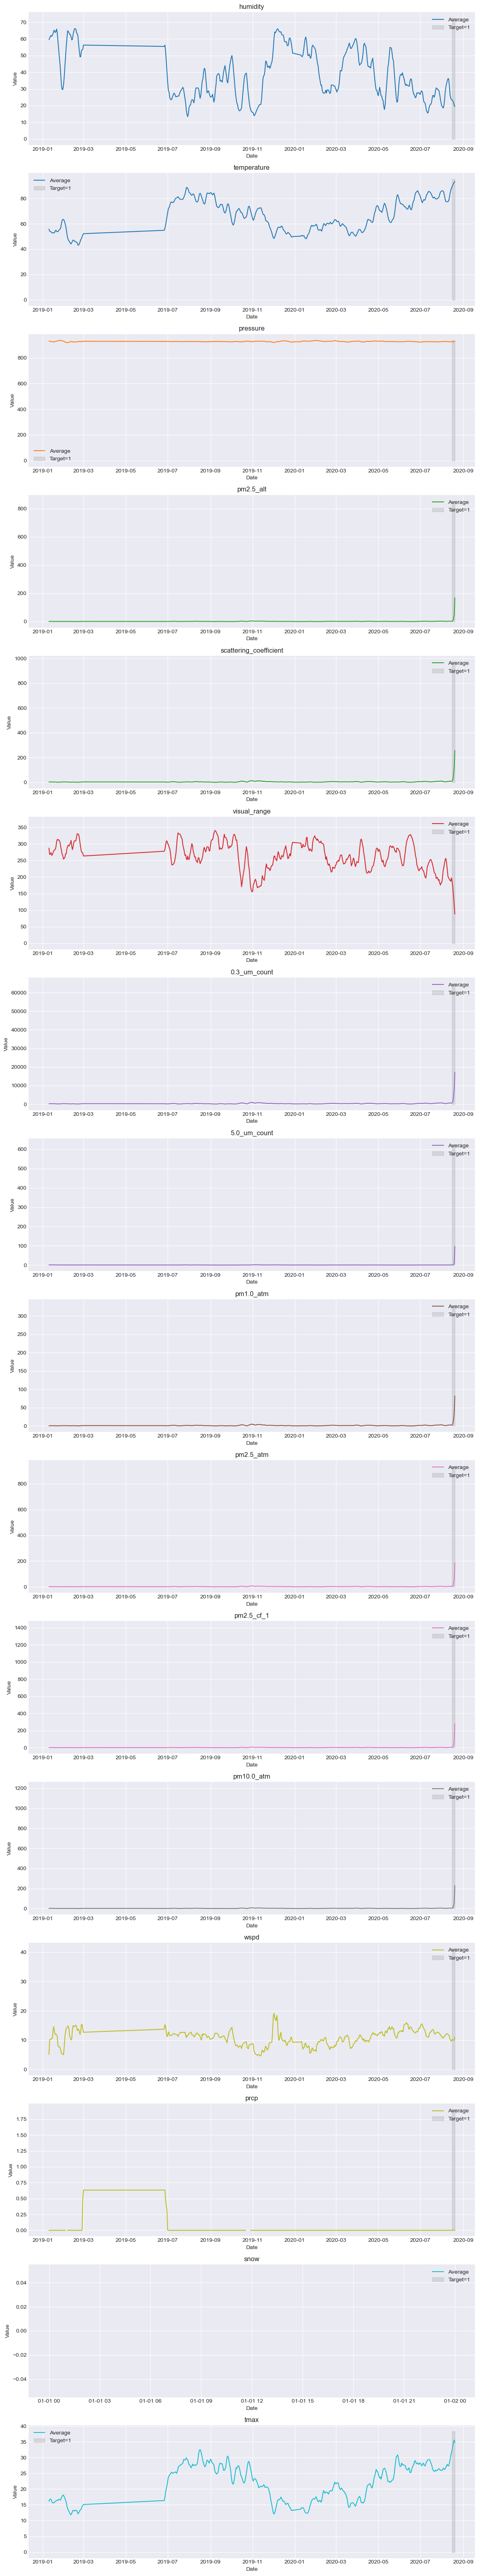

In [220]:
plot_sensor_data(subset_df, sensor_id='12869')

/var/folders/88/rkxmpw3j3nlddb7phwjzbx6r0000gn/T/ipykernel_23877/3740430012.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
/var/folders/88/rkxmpw3j3nlddb7phwjzbx6r0000gn/T/ipykernel_23877/3740430012.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab10', len(selected_columns) - 2)


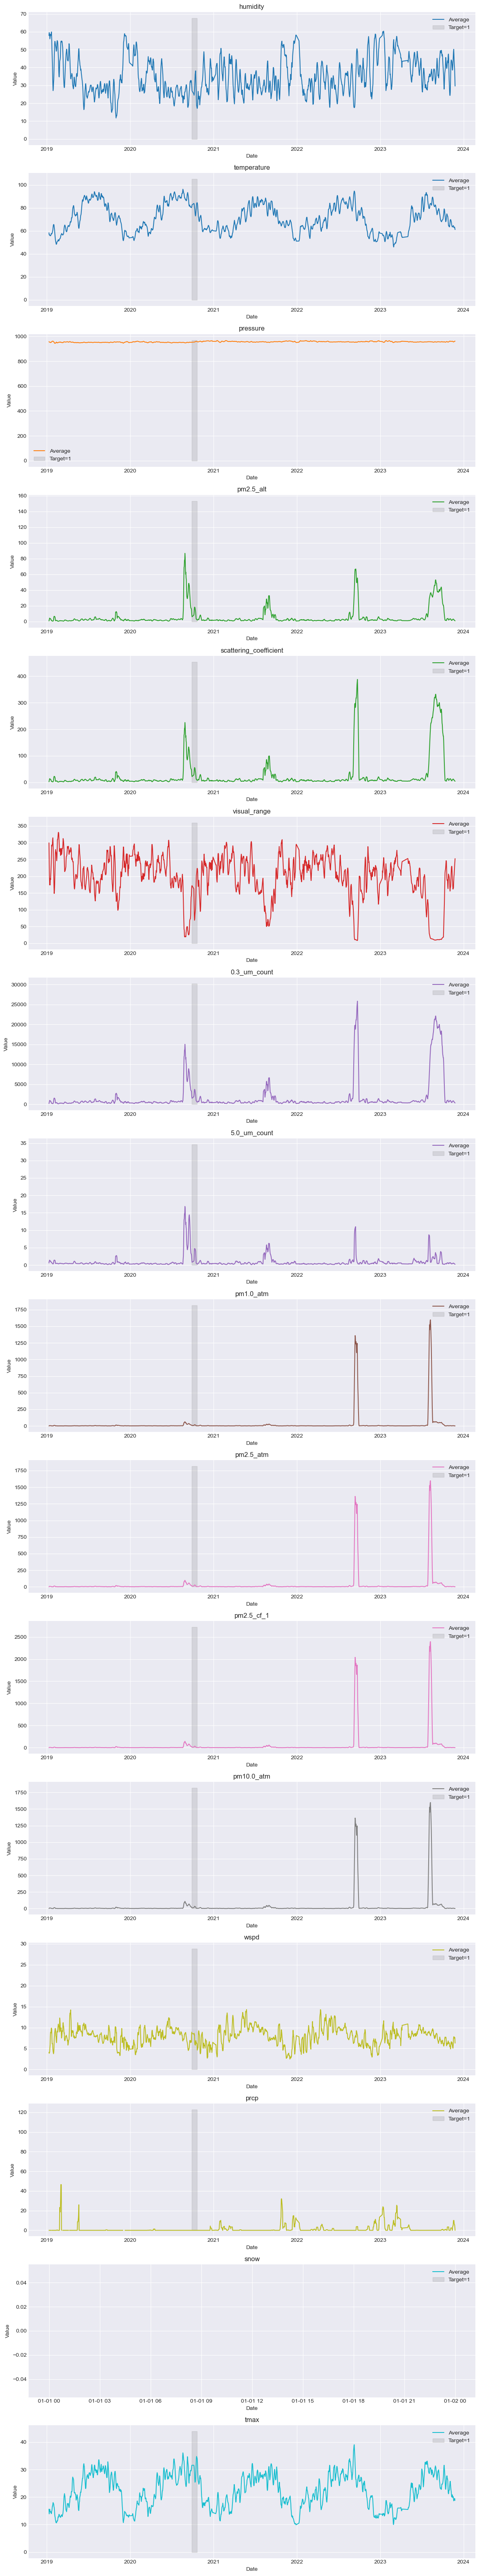

In [221]:
plot_sensor_data(subset_df, sensor_id='4478')

/var/folders/88/rkxmpw3j3nlddb7phwjzbx6r0000gn/T/ipykernel_23877/3740430012.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
/var/folders/88/rkxmpw3j3nlddb7phwjzbx6r0000gn/T/ipykernel_23877/3740430012.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab10', len(selected_columns) - 2)


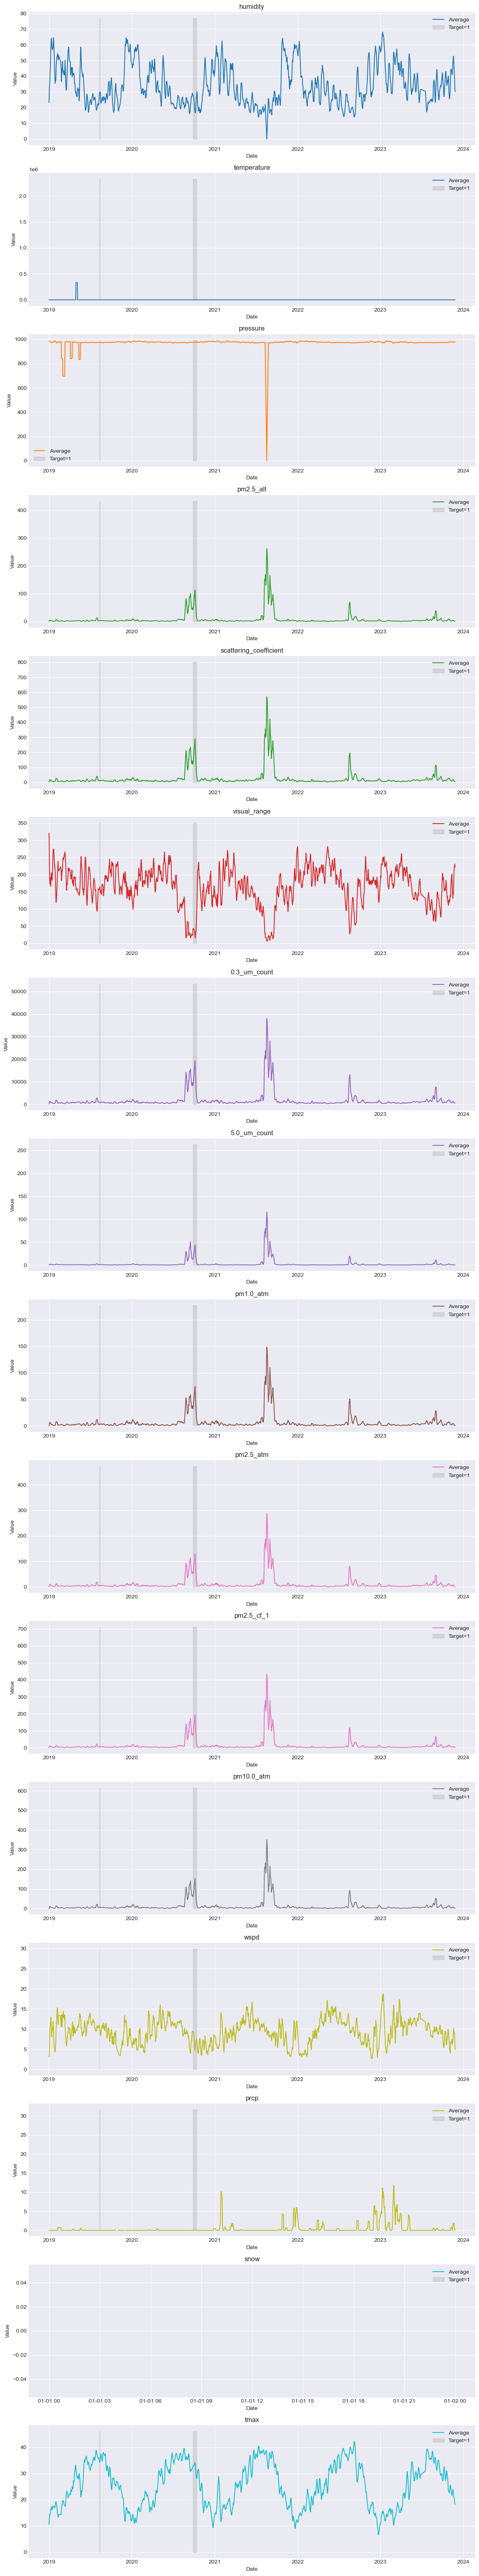

In [222]:
plot_sensor_data(subset_df, sensor_id='8136')

/var/folders/88/rkxmpw3j3nlddb7phwjzbx6r0000gn/T/ipykernel_23877/3740430012.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
/var/folders/88/rkxmpw3j3nlddb7phwjzbx6r0000gn/T/ipykernel_23877/3740430012.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab10', len(selected_columns) - 2)


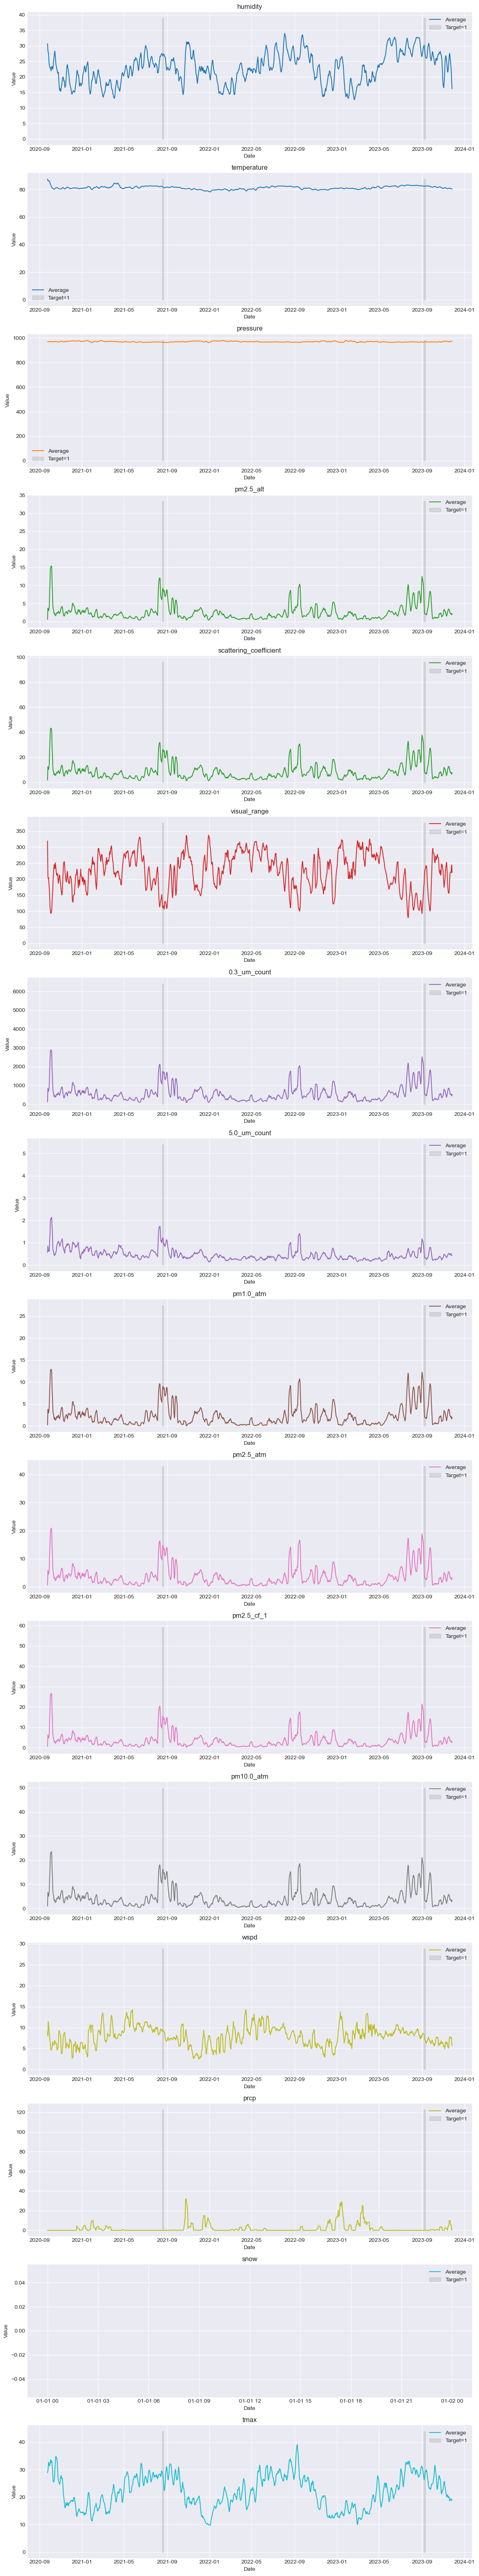

In [223]:
plot_sensor_data(subset_df, sensor_id='18461')

/var/folders/88/rkxmpw3j3nlddb7phwjzbx6r0000gn/T/ipykernel_23877/3740430012.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
/var/folders/88/rkxmpw3j3nlddb7phwjzbx6r0000gn/T/ipykernel_23877/3740430012.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab10', len(selected_columns) - 2)


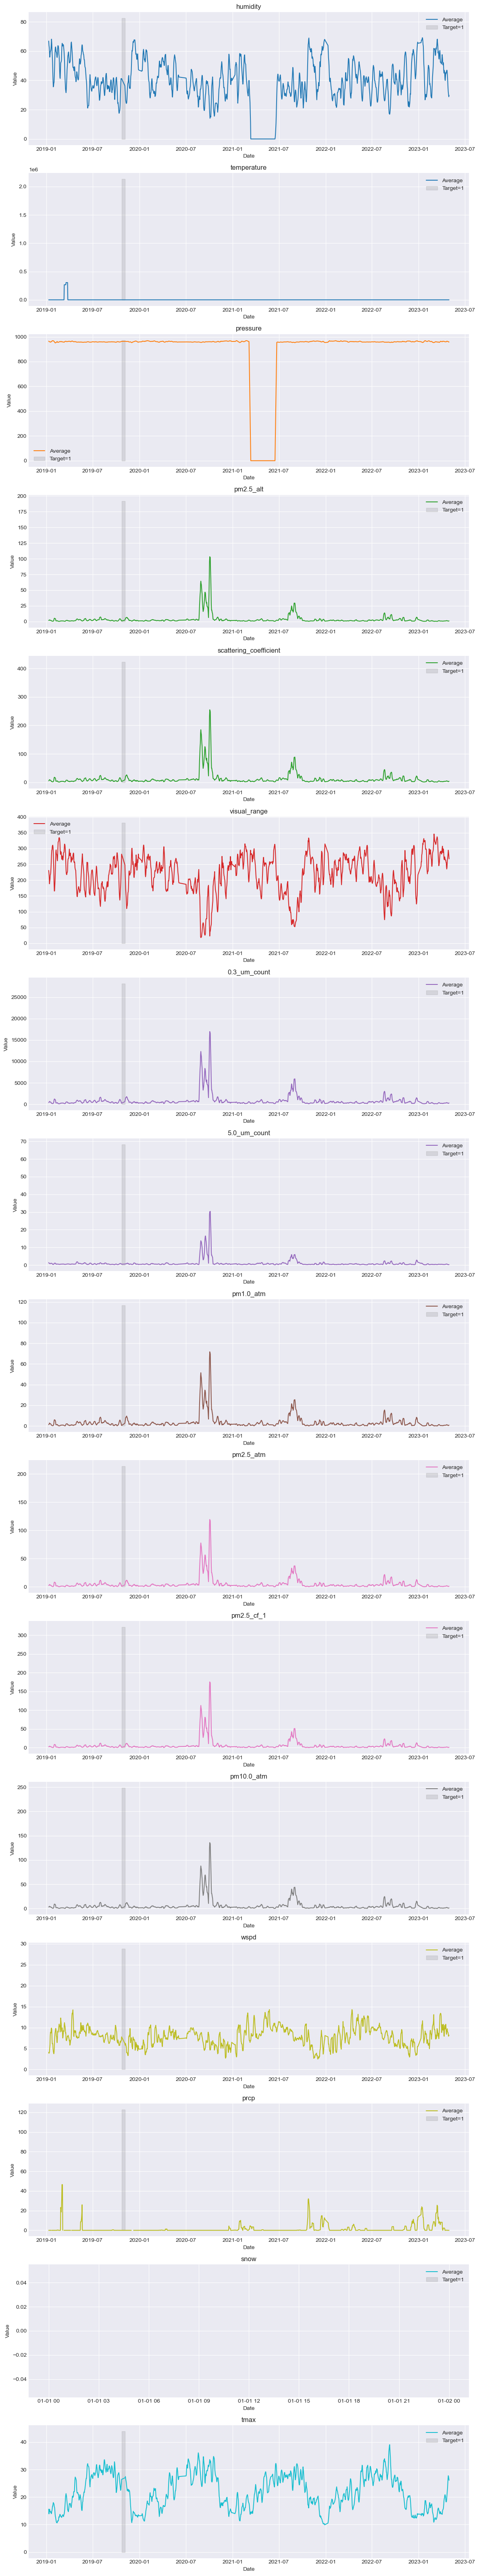

In [224]:
plot_sensor_data(subset_df, sensor_id='4091')

/var/folders/88/rkxmpw3j3nlddb7phwjzbx6r0000gn/T/ipykernel_23877/3740430012.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
/var/folders/88/rkxmpw3j3nlddb7phwjzbx6r0000gn/T/ipykernel_23877/3740430012.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab10', len(selected_columns) - 2)


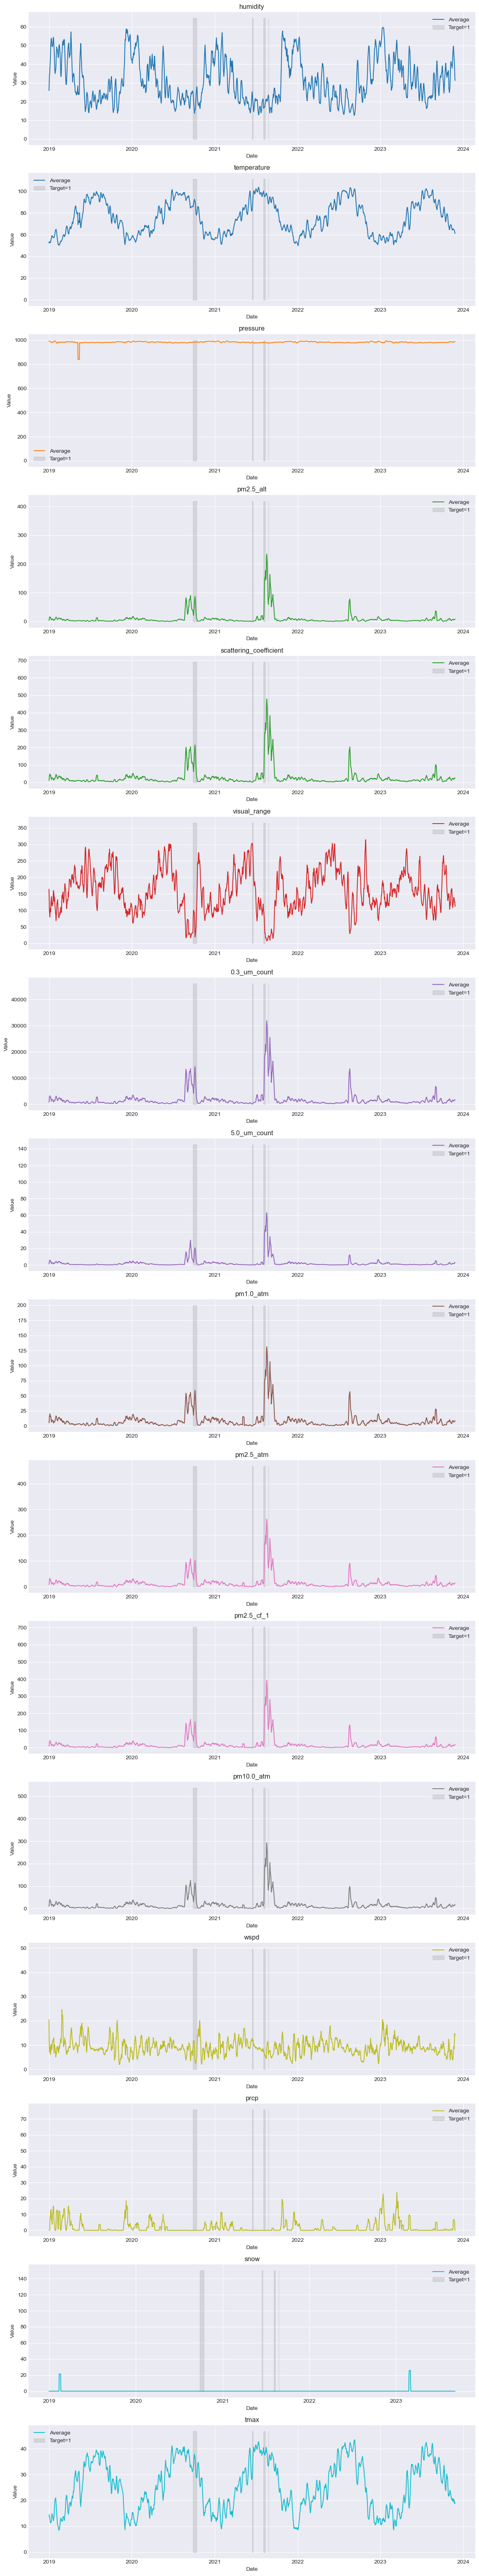

In [225]:
plot_sensor_data(subset_df, sensor_id='19989')

/var/folders/88/rkxmpw3j3nlddb7phwjzbx6r0000gn/T/ipykernel_23877/3740430012.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
/var/folders/88/rkxmpw3j3nlddb7phwjzbx6r0000gn/T/ipykernel_23877/3740430012.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab10', len(selected_columns) - 2)


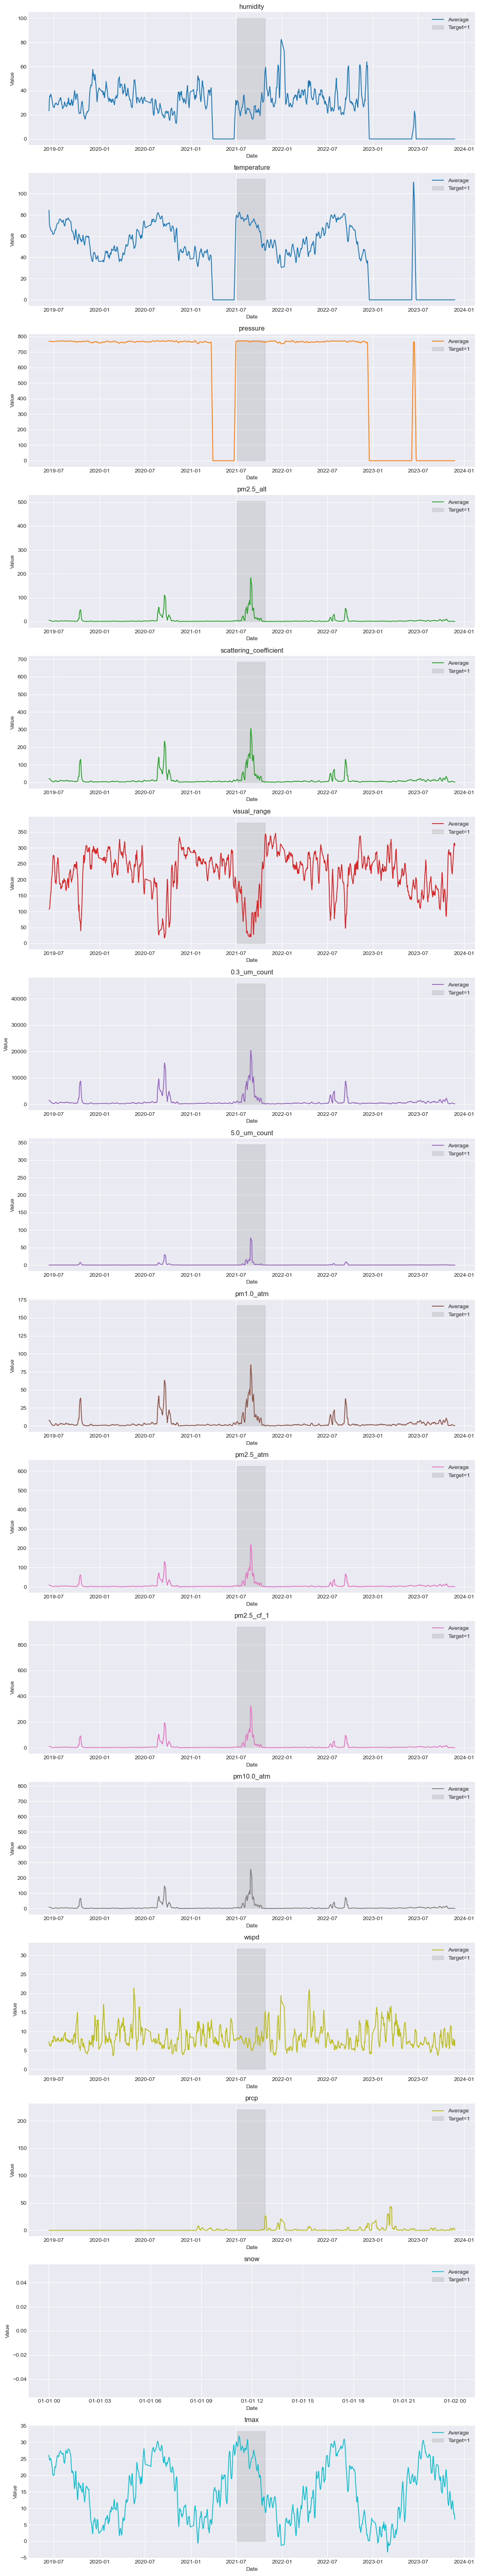

In [226]:
plot_sensor_data(subset_df, sensor_id='18557')

/var/folders/88/rkxmpw3j3nlddb7phwjzbx6r0000gn/T/ipykernel_23877/3740430012.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
/var/folders/88/rkxmpw3j3nlddb7phwjzbx6r0000gn/T/ipykernel_23877/3740430012.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab10', len(selected_columns) - 2)


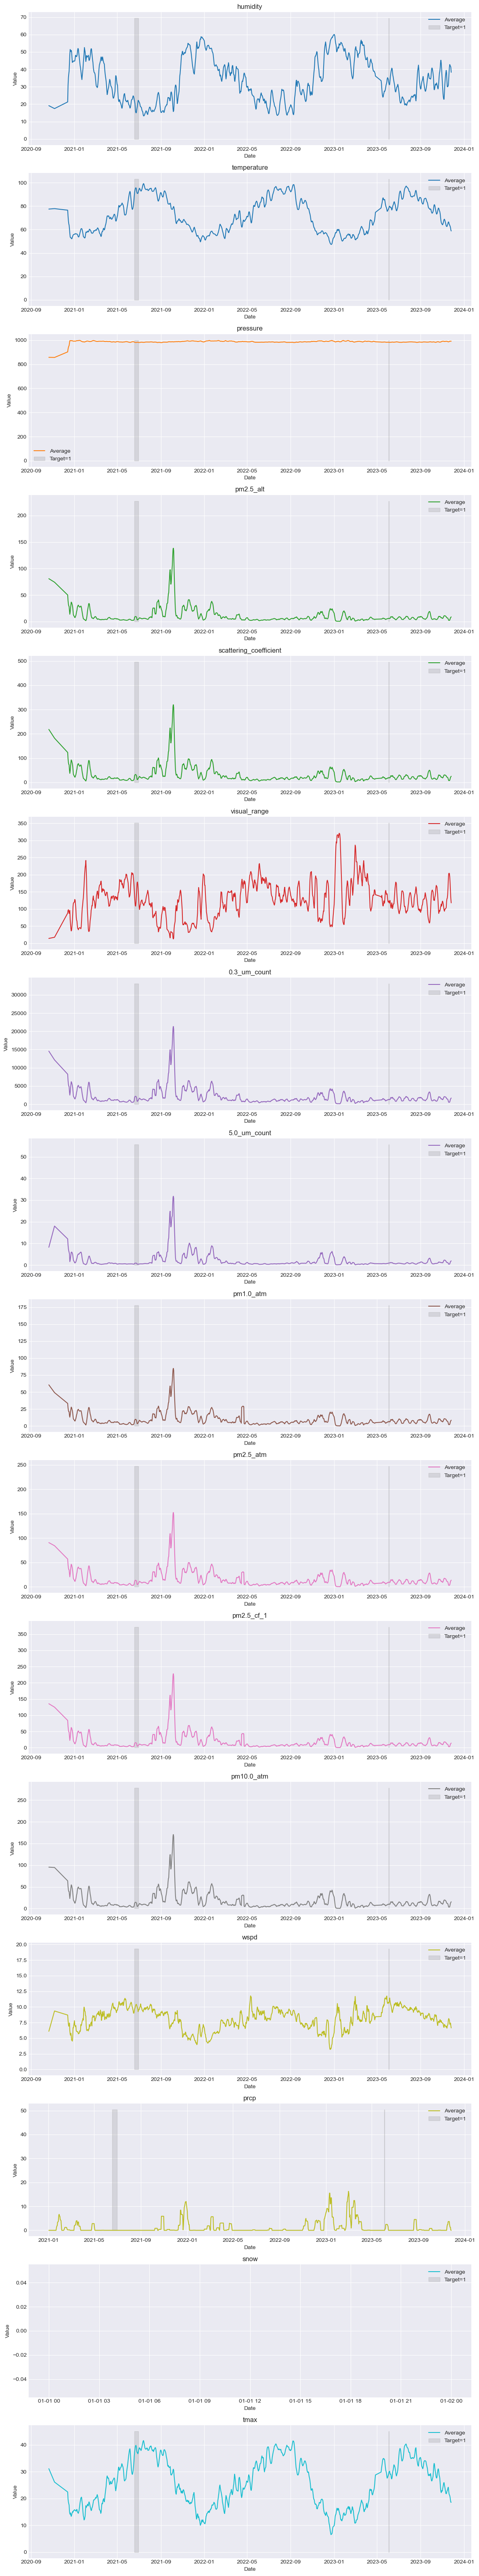

In [227]:
plot_sensor_data(subset_df, sensor_id='84181')